In [1]:
erstis <- read.csv2(file.choose(), stringsAsFactors = TRUE, fileEncoding = "UTF8")

In [2]:
str(erstis)

'data.frame':	90 obs. of  11 variables:
 $ ID                                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Studiengang                        : Factor w/ 3 levels "Archiv","Bibliothekswissenschaft",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Studium_erste_Wahl                 : Factor w/ 2 levels "ja","nein": 1 1 1 2 1 1 1 1 1 2 ...
 $ Entscheidung_in_Lebensphase        : Factor w/ 6 levels "In der Oberstufe",..: 1 5 1 1 2 1 6 1 1 2 ...
 $ Vorstellung_Werdegang              : Factor w/ 3 levels "bisher nur teilweise",..: 1 1 3 1 1 2 1 2 2 3 ...
 $ Beratungsbedarf_Teilzeitstudium    : Factor w/ 4 levels "eher unwichtig",..: 1 3 1 1 1 1 1 1 1 1 ...
 $ Beratungsbedarf_Berufsperspektiven : Factor w/ 4 levels "eher unwichtig",..: 4 2 4 4 2 4 4 4 4 2 ...
 $ Beratungsbedarf_Studienfinanzierung: Factor w/ 4 levels "eher unwichtig",..: 1 3 1 2 2 3 2 3 4 1 ...
 $ Alter                              : int  22 23 23 25 25 18 23 23 25 18 ...
 $ Geschlecht                         : Factor w/ 3 levels "keine

In [3]:
erstis$Beratungsbedarf_Teilzeitstudium <- factor(erstis$Beratungsbedarf_Teilzeitstudium, levels=levels(erstis$Beratungsbedarf_Teilzeitstudium)[c(4,2,1,3)])

In [8]:
#Alle Variablen mit derselben Skala gemeinsam umkodieren
for(i in 6:8) {
    erstis[,i] <- factor(erstis[,i], levels=levels(erstis[,i])[c(4,2,1,3)])
    print(levels(erstis[,i]))
}

[1] "wichtig"        "eher wichtig"   "eher unwichtig" "unwichtig"     
[1] "wichtig"        "eher wichtig"   "eher unwichtig" "unwichtig"     
[1] "wichtig"        "eher wichtig"   "eher unwichtig" "unwichtig"     


In [9]:
levels(erstis$Beratungsbedarf_Teilzeitstudium)

[1] "wichtig"        "eher wichtig"   "eher unwichtig" "unwichtig"

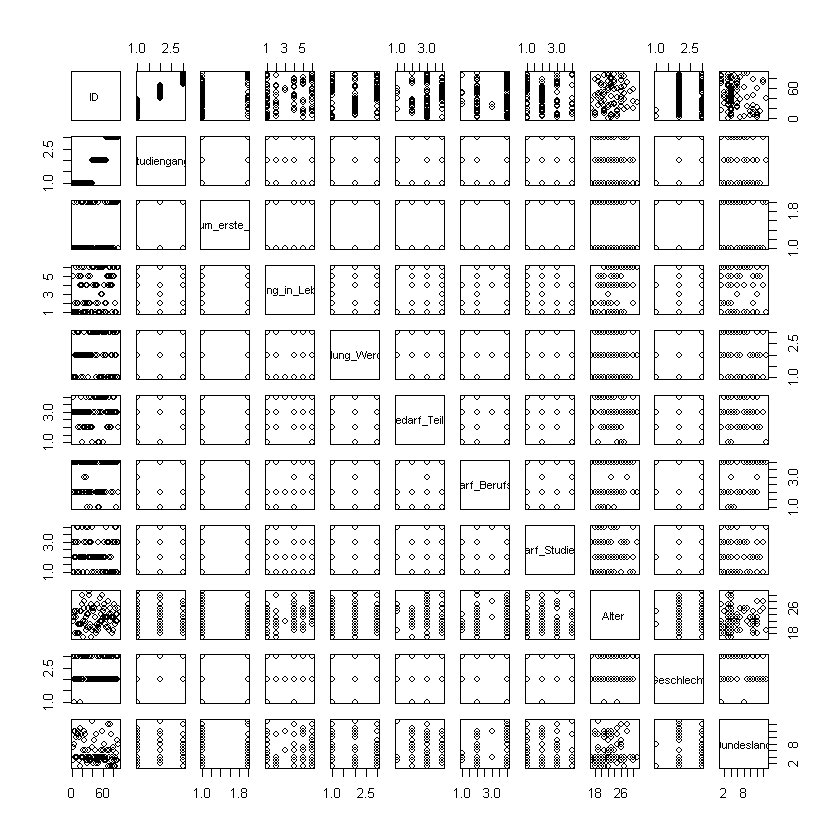

In [7]:
plot(erstis)

# Nominalskalenniveau

In [8]:
summary(erstis)

       ID                                    Studiengang Studium_erste_Wahl
 Min.   : 1.00   Archiv                            :39   ja  :62           
 1st Qu.:23.25   Bibliothekswissenschaft           :27   nein:28           
 Median :45.50   Informations- und\nDatenmanagement:24                     
 Mean   :45.50                                                             
 3rd Qu.:67.75                                                             
 Max.   :90.00                                                             
                                                                           
                  Entscheidung_in_Lebensphase          Vorstellung_Werdegang
 In der Oberstufe               :26           bisher nur teilweise:27       
 Sonstiges                      :13           ja                  :33       
 Vor Eintritt in die Oberstufe  : 2           nein                :30       
 Während eines anderen Studiums :15                                         
 Währen

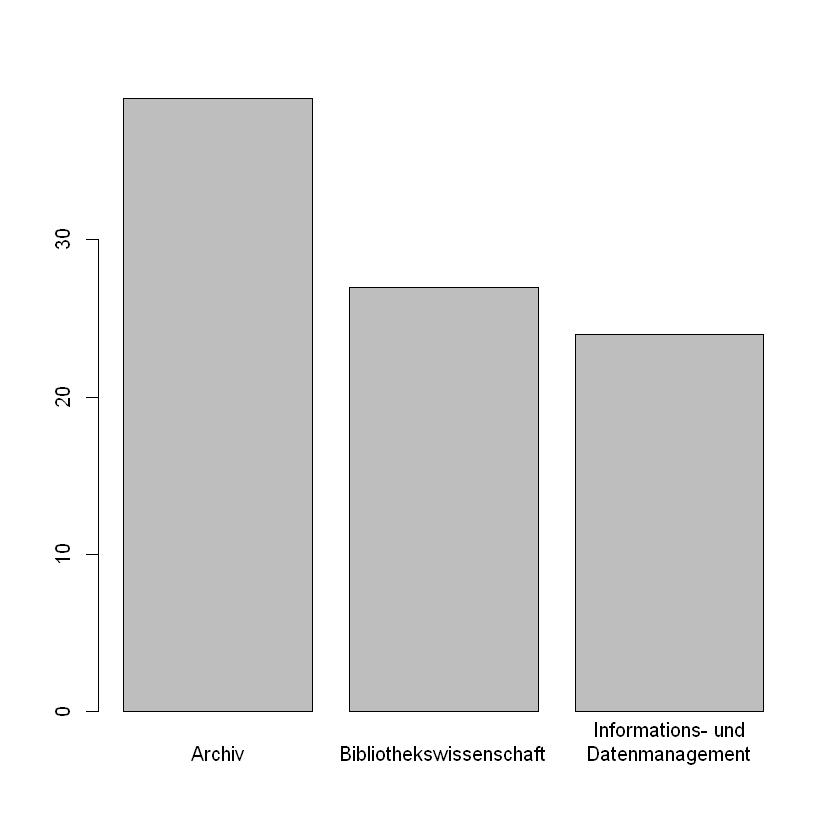

In [9]:
barplot(summary(erstis$Studiengang))

In [11]:
library(ggplot2)

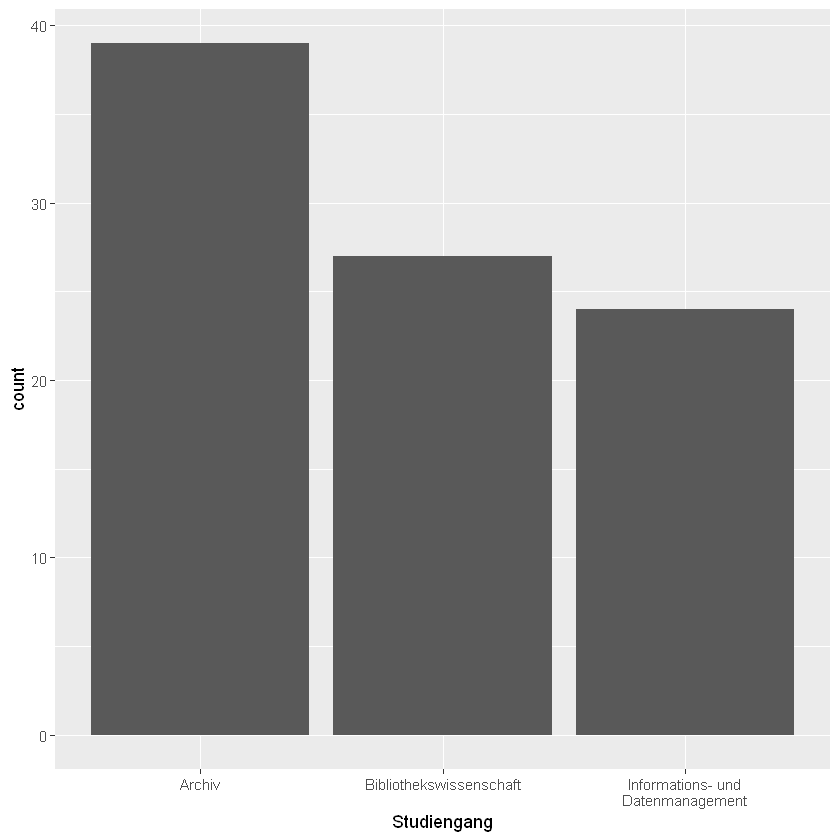

In [11]:
ggplot(erstis, aes(Studiengang)) + geom_bar()

# Ordinalskala

In [15]:
data.frame(summary(erstis$Beratungsbedarf_Teilzeitstudium))

summary.erstis.Beratungsbedarf_Teilzeitstudium.
wichtig         5                                             
eher wichtig   16                                             
eher unwichtig 42                                             
unwichtig      27

In [18]:
median(as.numeric(erstis$Beratungsbedarf_Teilzeitstudium))
data.frame(quantile(as.numeric(erstis$Beratungsbedarf_Teilzeitstudium)))

[1] 3

quantile.as.numeric.erstis.Beratungsbedarf_Teilzeitstudium..
0%   1                                                           
25%  3                                                           
50%  3                                                           
75%  4                                                           
100% 4

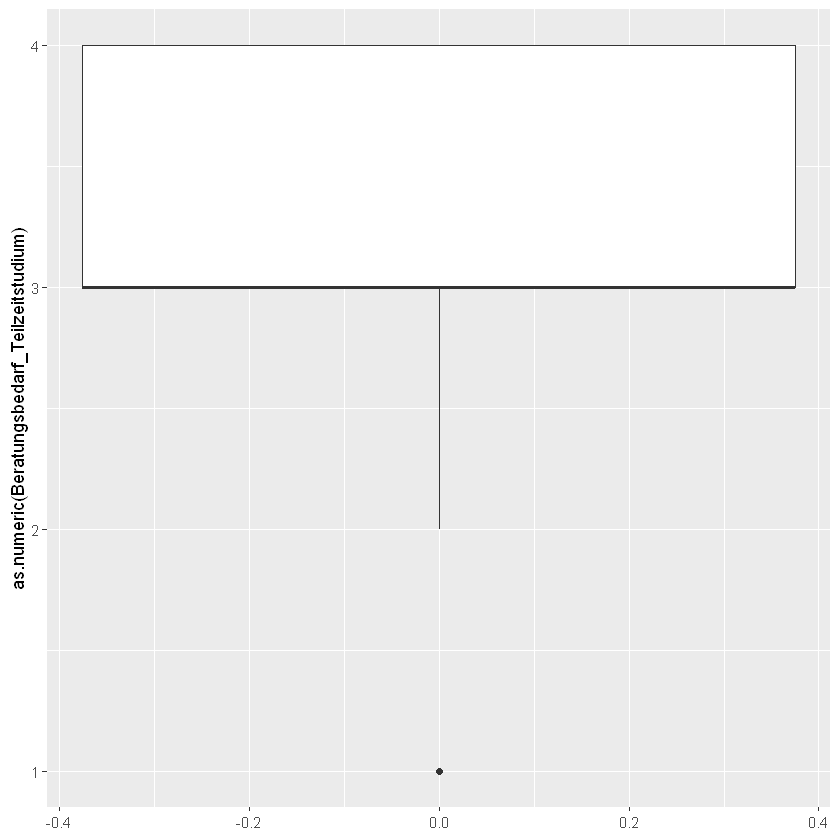

In [15]:
ggplot(erstis, aes(y=as.numeric(Beratungsbedarf_Teilzeitstudium))) + geom_boxplot()

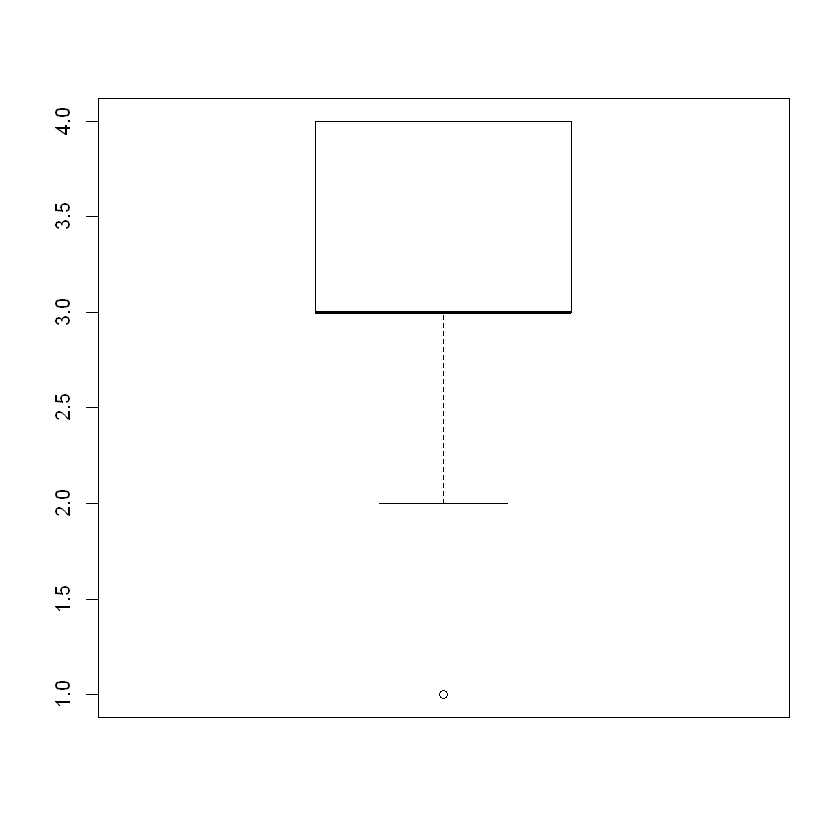

In [23]:
boxplot(as.numeric(erstis$Beratungsbedarf_Teilzeitstudium))

# Bivariate Analyse

In [5]:
table(erstis$Studiengang, erstis$Beratungsbedarf_Teilzeitstudium)

                                    
                                     wichtig eher wichtig eher unwichtig
  Archiv                                   1           11             22
  Bibliothekswissenschaft                  4            0              6
  Informations- und\nDatenmanagement       0            5             14
                                    
                                     unwichtig
  Archiv                                     5
  Bibliothekswissenschaft                   17
  Informations- und\nDatenmanagement         5

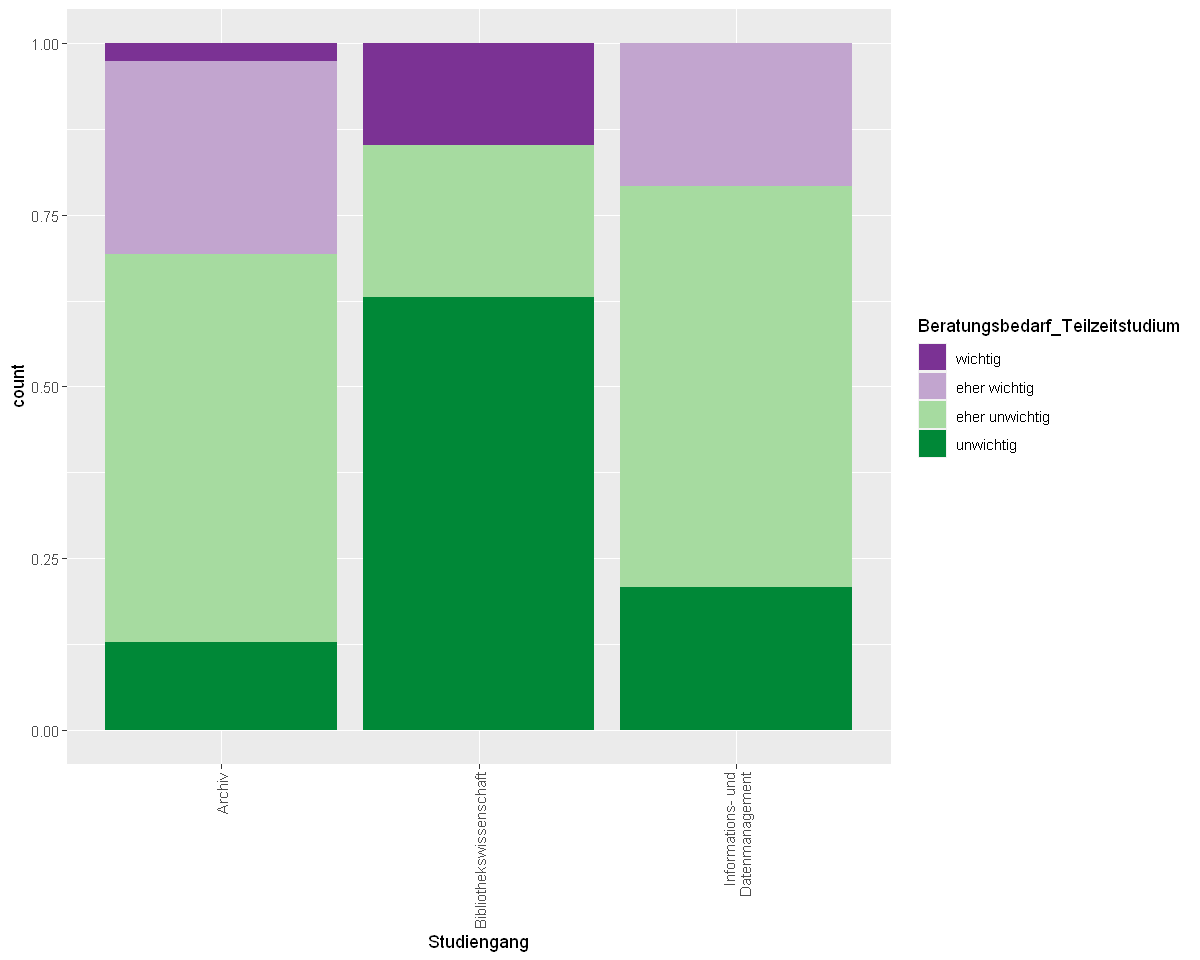

In [50]:
options(repr.plot.width=10, repr.plot.height=8) #Einstellen der Graphikgröße
library(ggplot2)
#gestapeltes Balkendiagramm mit absoluten Häufigkeiten
ggplot(erstis, aes(x=Studiengang, fill=Beratungsbedarf_Teilzeitstudium)) + 
    geom_bar(position="fill") + #Skalierung auf den Wertebereich von [0,1]
    theme(axis.text.x = element_text(angle = 90, vjust=0.5, hjust=1)) + #Ausrichtung der Achsenbeschrifung
    scale_fill_brewer(palette = "PRGn") #https://colorbrewer2.org/

In [11]:
multi <- read.csv(file.choose(), stringsAsFactors = TRUE)

In [12]:
str(multi)

'data.frame':	9 obs. of  3 variables:
 $ Aspekt_1: Factor w/ 2 levels "ja","nein": 2 1 2 2 2 1 2 1 2
 $ Aspekt_2: Factor w/ 2 levels "ja","nein": 1 2 1 1 1 2 1 1 2
 $ Aspekt_3: Factor w/ 2 levels "ja","nein": 2 2 1 1 1 2 1 1 2


In [13]:
multi$Aspekt_1 <- as.numeric(factor(multi$Aspekt_1, levels = rev(levels(multi$Aspekt_1))))
multi$Aspekt_2 <- as.numeric(factor(multi$Aspekt_2, levels = rev(levels(multi$Aspekt_2))))
multi$Aspekt_3 <- as.numeric(factor(multi$Aspekt_3, levels = rev(levels(multi$Aspekt_3))))

In [16]:
multi$Aspekt_1 <- multi$Aspekt_1 - 1
multi$Aspekt_2 <- multi$Aspekt_2 - 1
multi$Aspekt_3 <- multi$Aspekt_3 - 1

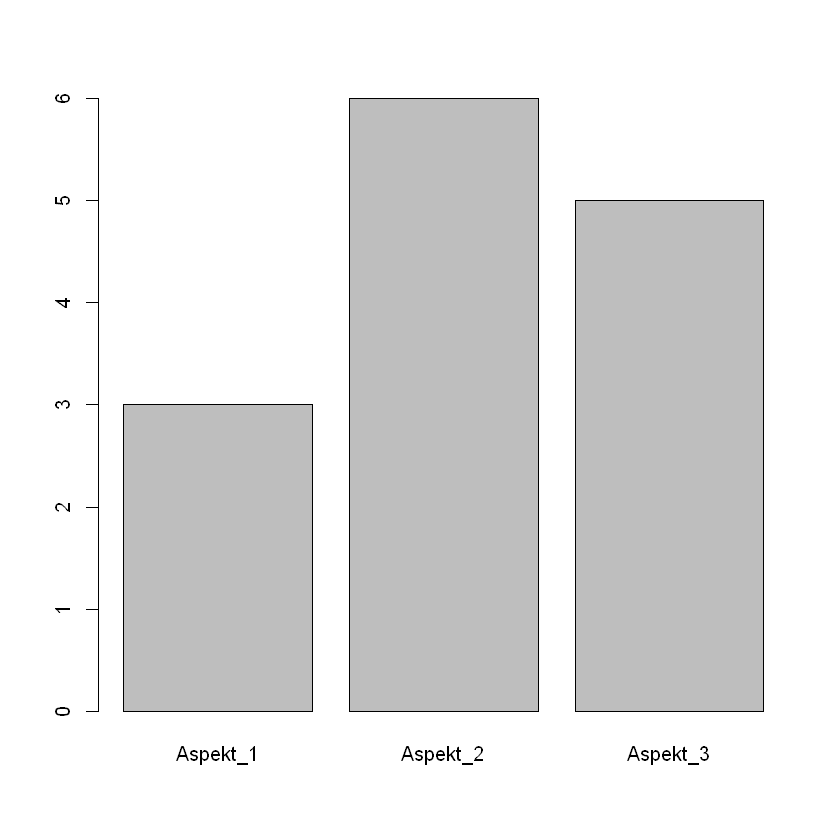

In [19]:
barplot(colSums(multi))